# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [115]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API Key
from api_keys import weather_api_key

# Output File (CSV)
output_file = "output_data/cities.csv"

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [88]:
# List for holding coordinates (latitude and longitud) and cities
coordinates = []
cities = []

# Create a set of random lat and long combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(long_range[0], long_range[1], size=1500)
coordinates = zip(lat, long)

# Identify nearest city for each lat, long combination
for lat_longs in coordinates:
    city = citipy.nearest_city(lat_longs[0], lat_longs[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
 #Lists and counters
new_cities = []
cloud = []
country = []
date = []
humidity = []
temp = []
lats = []
longs = []
wind = []
index_counter = 0
set_counter = 1

In [92]:
# Weather API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

response = requests.get(url + city).json()
response

{'coord': {'lon': 21.29, 'lat': 29.11},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 69.04,
  'feels_like': 65.16,
  'temp_min': 69.04,
  'temp_max': 69.04,
  'pressure': 1018,
  'humidity': 46,
  'sea_level': 1018,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 5.84, 'deg': 359},
 'clouds': {'all': 0},
 'dt': 1603563452,
 'sys': {'country': 'LY', 'sunrise': 1603514513, 'sunset': 1603554950},
 'timezone': 7200,
 'id': 88533,
 'name': 'Awjilah',
 'cod': 200}

In [93]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# For loop matching city names with cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        new_cities.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : borba
Processing Record 2 of Set 1 : taldan
City not found. Skipping...
Processing Record 3 of Set 1 : tiksi
City not found. Skipping...
Processing Record 4 of Set 1 : ostrovnoy
Processing Record 5 of Set 1 : albany
Processing Record 6 of Set 1 : bouloupari
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : wajima
Processing Record 9 of Set 1 : srednekolymsk
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : kentau
Processing Record 12 of Set 1 : itacare
Processing Record 13 of Set 1 : hambantota
Processing Record 14 of Set 1 : hobart
Processing Record 15 of Set 1 : bonavista
Processing Record 16 of Set 1 : shelburne
Processing Record 17 of Set 1 : illela
Processing Record 18 of Set 1 : bengkulu
Processing Record 19 of Set 1 : saint-georges
Processing Record 20 of Set 1 : avarua
Processing Record 21 of Set 1 : chokurdakh
Processing Record 22 of Set 1 : m

Processing Record 32 of Set 4 : saint-philippe
Processing Record 33 of Set 4 : lokosovo
Processing Record 34 of Set 4 : shumikha
Processing Record 35 of Set 4 : taoudenni
Processing Record 36 of Set 4 : north bend
Processing Record 37 of Set 4 : victoria
Processing Record 38 of Set 4 : norman wells
Processing Record 39 of Set 4 : bethel
City not found. Skipping...
Processing Record 40 of Set 4 : katsuura
Processing Record 41 of Set 4 : ostrogozhsk
Processing Record 42 of Set 4 : korcula
Processing Record 43 of Set 4 : evanston
Processing Record 44 of Set 4 : taksimo
Processing Record 45 of Set 4 : avera
Processing Record 46 of Set 4 : saquarema
Processing Record 47 of Set 4 : san vicente
Processing Record 48 of Set 4 : plettenberg bay
Processing Record 49 of Set 4 : puerto madryn
Processing Record 50 of Set 4 : dakar
Processing Record 0 of Set 5 : quatre cocos
Processing Record 1 of Set 5 : port alfred
Processing Record 2 of Set 5 : saint-pierre
Processing Record 3 of Set 5 : ulladulla

Processing Record 19 of Set 8 : saint george
Processing Record 20 of Set 8 : birao
Processing Record 21 of Set 8 : mackay
Processing Record 22 of Set 8 : whitehorse
Processing Record 23 of Set 8 : cumra
Processing Record 24 of Set 8 : tuy hoa
Processing Record 25 of Set 8 : kavieng
Processing Record 26 of Set 8 : ketchikan
Processing Record 27 of Set 8 : fernandez
Processing Record 28 of Set 8 : yeniseysk
Processing Record 29 of Set 8 : zhiryatino
Processing Record 30 of Set 8 : karlstadt
Processing Record 31 of Set 8 : ahuimanu
Processing Record 32 of Set 8 : oliveira dos brejinhos
Processing Record 33 of Set 8 : pedraza
City not found. Skipping...
Processing Record 34 of Set 8 : jacareacanga
Processing Record 35 of Set 8 : wladyslawowo
Processing Record 36 of Set 8 : mitzic
Processing Record 37 of Set 8 : karaton
City not found. Skipping...
Processing Record 38 of Set 8 : deputatskiy
Processing Record 39 of Set 8 : alta floresta
Processing Record 40 of Set 8 : bucerias
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
 #Create a dataframe using information from data retrieval
weather_dict = ({"City" : new_cities, 
                 "Lat" : lats, 
                 "Long" : longs, 
                 "Max Temp" : temp,                            
                 "Humidity" : humidity, 
                 "Clouds" : cloud, 
                 "Wind Speed" : wind, 
                 "Country" : country, 
                 "Date" : date
                 })

weather_data = pd.DataFrame(weather_dict)

In [95]:
# Count weather data
weather_data.count()

City          557
Lat           557
Long          557
Max Temp      557
Humidity      557
Clouds        557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [96]:
# Display dataframe
weather_data.head(10)

,City,Lat,Long,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Borba,-4.39,-59.59,80.65,90,100,2.24,BR,1603563472
1,Taldan,53.67,124.80,27.73,94,0,5.39,RU,1603563472
2,Tiksi,71.69,128.87,12.33,91,59,21.47,RU,1603563473
3,Ostrovnoy,68.05,39.51,32.45,97,100,13.38,RU,1603563473
4,Albany,42.60,-73.97,59.00,66,89,12.80,US,1603563467
5,Bouloupari,-21.87,166.05,68.00,88,0,1.12,NC,1603563473
6,Ushuaia,-54.80,-68.30,51.80,58,75,12.75,AR,1603563418
7,Wajima,37.40,136.90,56.08,63,86,19.95,JP,1603563473
8,Srednekolymsk,67.45,153.68,16.34,94,0,4.99,RU,1603563475
9,Punta Arenas,-53.15,-70.92,42.80,87,90,11.41,CL,1603563475


In [97]:
#Save weather data to a csv file
weather_data.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [98]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_data.loc[weather_data['Humidity'] > 100]

,City,Lat,Long,Max Temp,Humidity,Clouds,Wind Speed,Country,Date


##### There are no cities where the humidity is greater than 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Scatter Plots

In [99]:
# Define a function for scatter plots

coord = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) >= 0.0, :]

def scatter(x_axis, y_axis, x_label, y_label, title, ifig):
    plt.scatter(x_axis, y_axis, color = "yellow", edgecolor = "black")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle='-', linewidth=2, alpha=0.5)
    plt.title(title)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

### Latitude vs. Temperature Plot

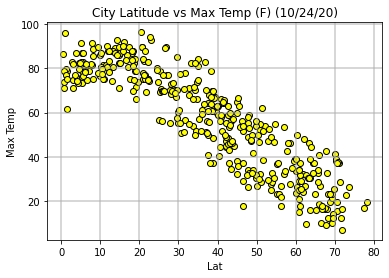

In [100]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Max Temp"
title = (f"City Latitude vs Max Temp (F) (10/24/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 1)

### Latitude vs. Humidity Plot

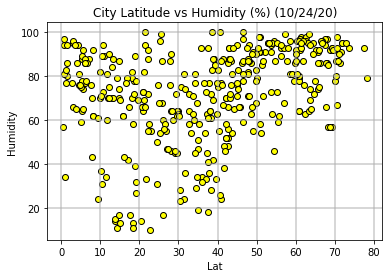

In [101]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Humidity"
title = (f"City Latitude vs Humidity (%) (10/24/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 2)

### Latitude vs. Cloudiness Plot

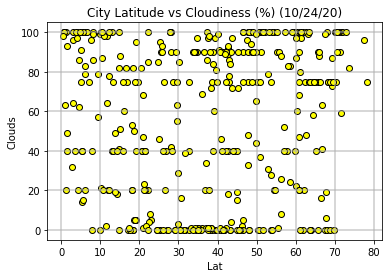

In [102]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Clouds"
title = (f"City Latitude vs Cloudiness (%) (10/24/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 3)

### Latitude vs. Wind Speed Plot

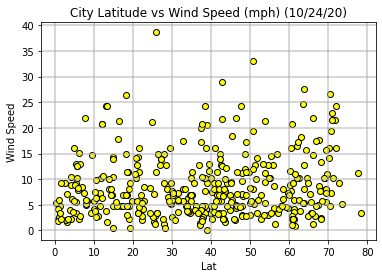

In [103]:
# Define variables and create plot using scatter function
x_label = "Lat"
y_label = "Wind Speed"
title = (f"City Latitude vs Wind Speed (mph) (10/24/20)")
scatter(coord[x_label], coord[y_label], x_label, y_label, title, 4)

## Linear Regression

In [104]:
# Generate linear regression on each relationship separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
north = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) >= 0.0, :]
# and Southern Hemisphere (less than 0 degrees latitude):
south = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0.0, :]

In [105]:
# Define a function to plot linear regression
def plot_lr(x_axis, y_axis, x_label, y_label, label_pos, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, color = "lightgreen", edgecolor = "black")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq, label_pos, fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8874580785105394


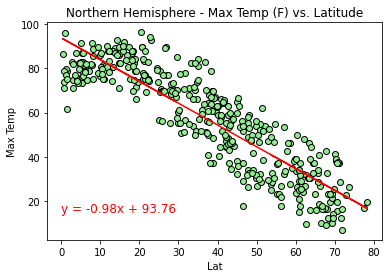

In [106]:
# Define variables for linear regression of northern hemisphere and create linear regression plot function plot_lr
x_label = "Lat"
y_label = "Max Temp"
label_pos = (0,15)
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plot_lr(north[x_label], north[y_label], x_label, y_label, label_pos, 5)

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6608358091804011


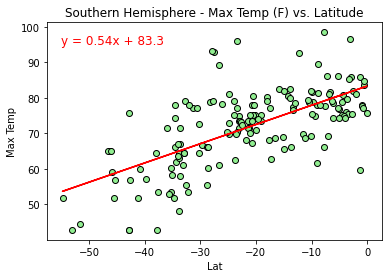

In [107]:
# Define variables for linear regression of southern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Max Temp"
label_pos = (-55,95)
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plot_lr(south[x_label], south[y_label], x_label, y_label, label_pos, 6)

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31190271396187585


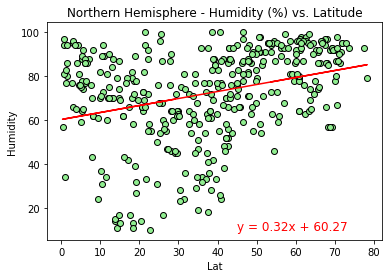

In [108]:
# Define variables for linear regression of northern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Humidity"
label_pos = (45,10)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plot_lr(north[x_label], north[y_label], x_label, y_label, label_pos, 7)

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05812689433216297


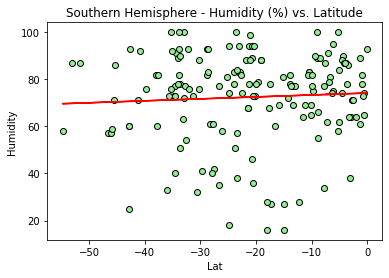

In [109]:
# Define variables for linear regression of southern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Humidity"
label_pos = (-55,10)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plot_lr(south[x_label], south[y_label], x_label, y_label, label_pos, 8)

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06297887810184444


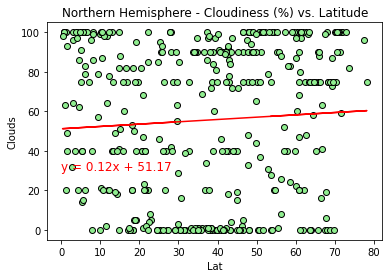

In [110]:
# Define variables for linear regression of northern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Clouds"
label_pos = (0,30)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plot_lr(north[x_label], north[y_label], x_label, y_label, label_pos, 9)

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006057081935957516


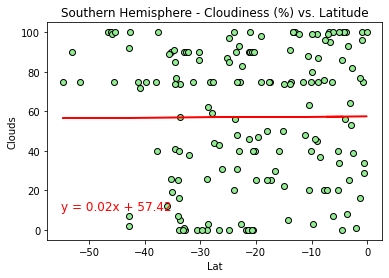

In [111]:
# Define variables for linear regression of southern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Clouds"
label_pos = (-55,10)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plot_lr(south[x_label], south[y_label], x_label, y_label, label_pos, 10)

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1344370867685238


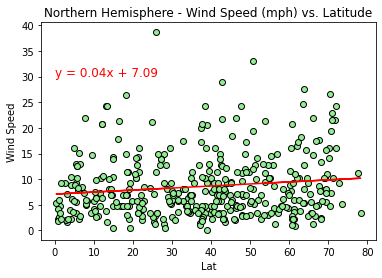

In [112]:
# Define variables for linear regression of northern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Wind Speed"
label_pos = (0,30)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plot_lr(north[x_label], north[y_label], x_label, y_label, label_pos, 11)

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.13702886109776077


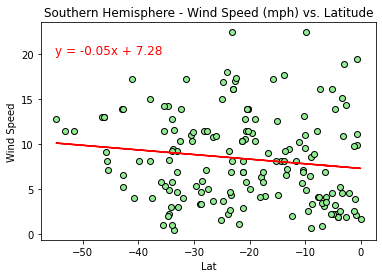

In [113]:
# Define variables for linear regression of southern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Wind Speed"
label_pos = (-55,20)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plot_lr(south[x_label], south[y_label], x_label, y_label, label_pos, 12)